In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

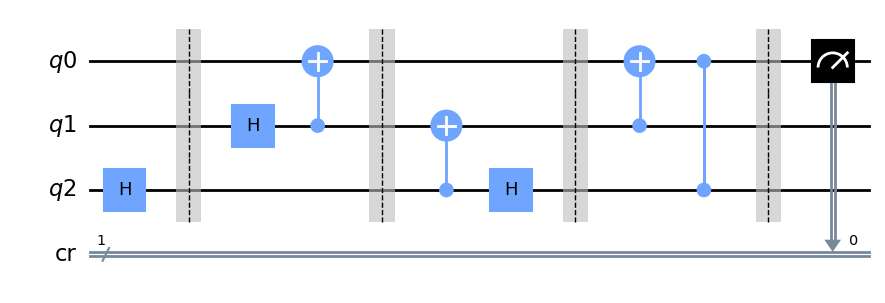

In [33]:
#initialize 3-qubit circuit with named registers
q2 = QuantumRegister(1, name="q2")  # source (sender) qubit
q1 = QuantumRegister(1, name="q1")  # half of entangled Bell state qubit pari sent to sender
q0 = QuantumRegister(1, name="q0")  # half of entangled Bell state qubit pair retained by reciever (receiver)

cr = ClassicalRegister(1, name="cr") # final result

circuit = QuantumCircuit(q0, q1, q2, cr)

# initialize source qubit (quantum state to teleport)
circuit.h(q2)

circuit.barrier()

# create Bell state pair
circuit.h(q1)
circuit.cx(q1, q0)

circuit.barrier()

# sender performs Bell state mercuitasurement
circuit.cx(q2, q1)
circuit.h(q2)
circuit.barrier()
circuit.cx(q1, q0)
circuit.cz(q2, q0)
circuit.barrier()

circuit.measure(0, 0)

circuit.draw(output='mpl')

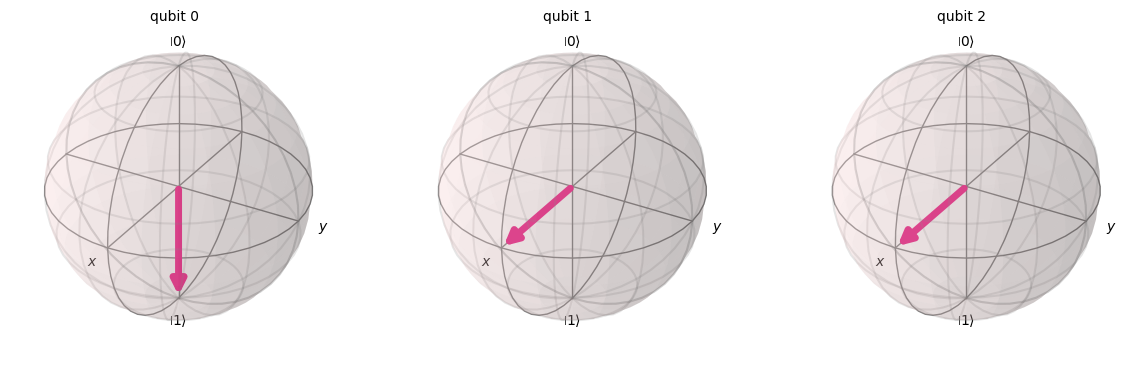

In [34]:
simulator = Aer.get_backend('statevector_simulator')  # create simulator returning state vector of qubit
result = execute(circuit, backend = simulator).result()  # only single shot needed
statevector = result.get_statevector()
plot_bloch_multivector(statevector)  # print bloch sphere

In [35]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options, Sampler
from qiskit.tools.monitor import job_monitor

In [36]:
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='fd27bc3d02008d4c5d6bd3fd09bd1a44f78d088468c74b9f797079443a28b8bcdeaf8e9eff9e3e21289001e5e4904899a32f8275ef50228a4363b89747403dcf'
)


In [37]:
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)

sampler = Sampler(backend=backend)

job = sampler.run(circuit, shots=100)

# monitor job
job_monitor(job)

print("Job ID", job.id())

qcomp_result = job.result()
plot_histogram(qcomp_result.result())

Job Status: job has successfully run


AttributeError: 'RuntimeJob' object has no attribute 'id'